# Линейные модели, SVM и деревья решений.

В качестве набора данных используется набор данных по раку груди висконсин (диагностический)
Файл содержит следующие колонки:

- радиус (среднее расстояние от центра до точек по периметру)
- текстура (стандартное отклонение значений шкалы серого)
- периметр
- область
- гладкость (локальное изменение длины радиуса)
- компактность (периметр ^ 2 / площадь - 1.0)
- вогнутость (выраженность вогнутых участков контура)
- вогнутые точки (количество вогнутых участков контура)
- симметрия
- фрактальная размерность («приближение береговой линии» - 1)

Классы:
- WDBC-злокачественный
- WDBC-доброкачественный

In [1]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
%matplotlib inline 
sns.set(style="ticks")

In [2]:
breast = load_breast_cancer()

In [3]:
df_breast = pd.DataFrame(breast.data,columns=breast.feature_names)
df_breast['target'] = pd.Series(breast.target)
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# Значения и наименования значений целевого признака
list(zip(np.unique(breast.target), breast.target_names))

[(0, 'malignant'), (1, 'benign')]

<AxesSubplot:>

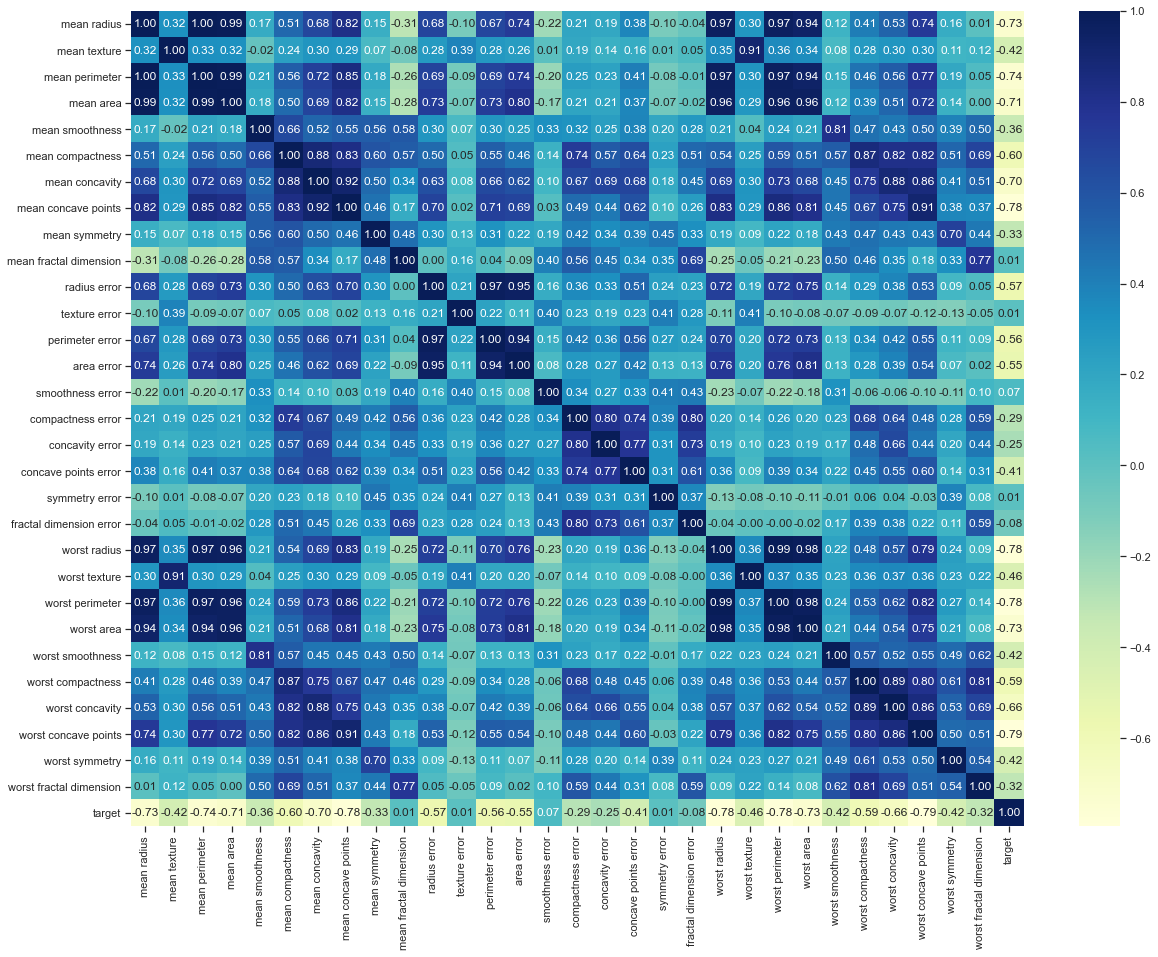

In [5]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df_breast.corr(method='pearson'), ax=ax, annot=True, fmt='.2f', cmap="YlGnBu")

## Логистическая регрессия (LogisticRegression)

In [6]:
breast_X_train, breast_X_test, breast_y_train, breast_y_test = train_test_split(
    breast.data, breast.target, test_size=0.5, random_state=1)

In [7]:
cl1 = LogisticRegression(max_iter=10000)

In [8]:
cl1.fit(breast_X_train, breast_y_train)

LogisticRegression(max_iter=10000)

In [9]:
pred_breast_y_test = cl1.predict(breast_X_test)
pred_breast_y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [10]:
pred_breast_y_test_proba = cl1.predict_proba(breast_X_test)
pred_breast_y_test_proba[:10]

array([[8.98606615e-01, 1.01393385e-01],
       [8.17363280e-01, 1.82636720e-01],
       [1.04150887e-05, 9.99989585e-01],
       [9.99243575e-01, 7.56424596e-04],
       [8.92510753e-01, 1.07489247e-01],
       [9.99994694e-01, 5.30628541e-06],
       [9.99995423e-01, 4.57664984e-06],
       [9.17298433e-01, 8.27015673e-02],
       [1.26762613e-04, 9.99873237e-01],
       [5.76865764e-04, 9.99423134e-01]])

In [11]:
# Вероятность принадлежности к 0 классу
[round(x, 4) for x in pred_breast_y_test_proba[:10,0]]

[0.8986, 0.8174, 0.0, 0.9992, 0.8925, 1.0, 1.0, 0.9173, 0.0001, 0.0006]

In [12]:
# Вероятность принадлежности к 1 классу
[round(x, 4) for x in pred_breast_y_test_proba[:10,1]]

[0.1014, 0.1826, 1.0, 0.0008, 0.1075, 0.0, 0.0, 0.0827, 0.9999, 0.9994]

In [13]:
# Сумма вероятностей равна 1
pred_breast_y_test_proba[:10,0] + pred_breast_y_test_proba[:10,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
accuracy_score(breast_y_test, pred_breast_y_test)

0.9263157894736842

In [15]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [16]:
print_accuracy_score_for_classes(breast_y_test, pred_breast_y_test)

Метка 	 Accuracy
0 	 0.883495145631068
1 	 0.9505494505494505


## Метод опорных векторов (SVC)

In [17]:
breast_X_a = df_breast['worst radius'].values
breast_X_b = df_breast['worst texture'].values
breast_X = np.column_stack((breast_X_a, breast_X_b))
breast_y = breast.target

In [18]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(breast_X, breast_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = breast_X[:, 0], breast_X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=breast_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('worst radius')
    ax.set_ylabel('worst texture')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

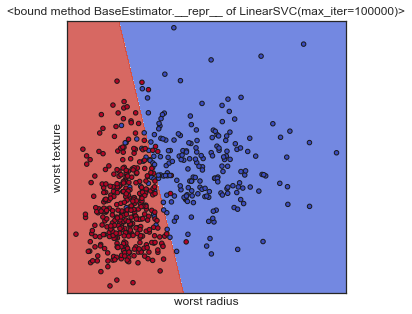

In [19]:
plot_cl(LinearSVC(C=1.0, max_iter=100000))

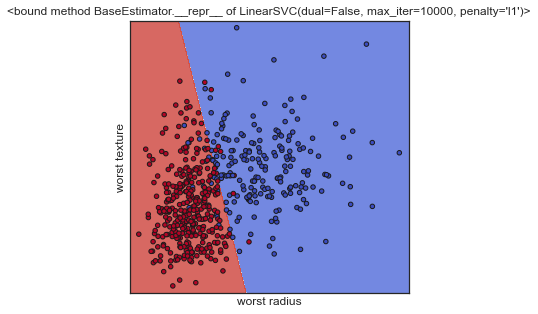

In [20]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000))

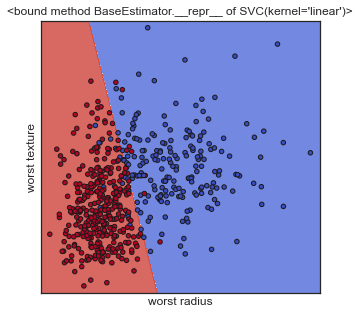

In [21]:
plot_cl(SVC(kernel='linear', C=1.0))

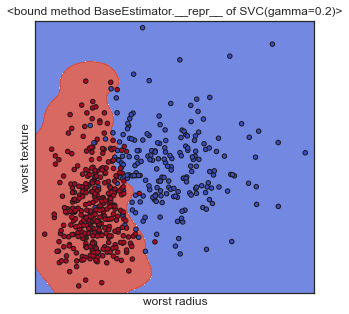

In [22]:
plot_cl(SVC(kernel='rbf', gamma=0.2, C=1.0))

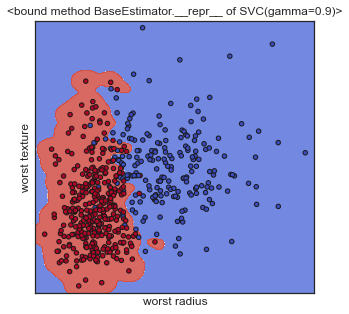

In [23]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

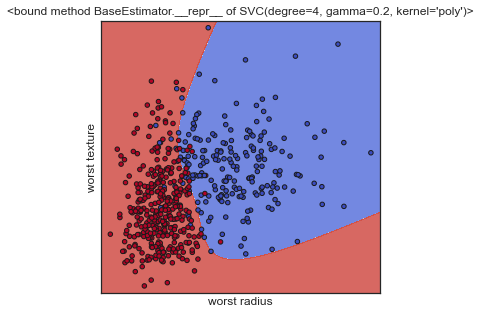

In [24]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.2, C=1.0))

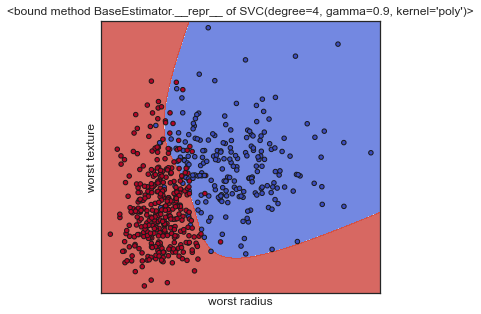

In [25]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.9, C=1.0))

In [26]:
breast_X_train_1, breast_X_test_1, breast_y_train_1, breast_y_test_1 = train_test_split(
    breast.data, breast.target, test_size=0.5, random_state=1)
breast_X_train_1.shape, breast_X_test_1.shape

((284, 30), (285, 30))

In [27]:
svc_1 = SVC()
svc_1.fit(breast_X_train_1, breast_y_train_1)

SVC()

In [28]:
breast_y_pred_1 = svc_1.predict(breast_X_test_1)

In [29]:
mean_absolute_error(breast_y_test_1, breast_y_pred_1), mean_squared_error(breast_y_test_1, breast_y_pred_1)

(0.0912280701754386, 0.0912280701754386)

## Деревья решений (DecisionTreeClassifier)

In [30]:
breast_x_ds = pd.DataFrame(data=breast['data'], columns=breast['feature_names'])
breast_x_ds.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
# Обучим дерево на всех признаках
breast_tree_cl = DecisionTreeClassifier(random_state=1)
breast_tree_cl.fit(breast_x_ds, breast.target)
breast_tree_cl

DecisionTreeClassifier(random_state=1)

In [32]:
from IPython.core.display import HTML
from sklearn.tree.export import export_text
tree_rules = export_text(breast_tree_cl, feature_names=list(breast_x_ds.columns))
HTML('<pre>' + tree_rules + '</pre>')

C:\Users\kenia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [34]:
# Важность признаков
list(zip(breast_x_ds.columns.values, breast_tree_cl.feature_importances_))

[('mean radius', 0.0),
 ('mean texture', 0.011277152370382112),
 ('mean perimeter', 0.0),
 ('mean area', 0.0),
 ('mean smoothness', 0.007016894808237761),
 ('mean compactness', 0.0),
 ('mean concavity', 0.008771118510297198),
 ('mean concave points', 0.0),
 ('mean symmetry', 0.0),
 ('mean fractal dimension', 0.0),
 ('radius error', 0.0),
 ('texture error', 0.0),
 ('perimeter error', 0.0),
 ('area error', 0.008936807857691388),
 ('smoothness error', 0.0010038401246787545),
 ('compactness error', 0.005638576185191056),
 ('concavity error', 0.0),
 ('concave points error', 0.0),
 ('symmetry error', 0.005831348020582203),
 ('fractal dimension error', 0.00644408706878978),
 ('worst radius', 0.6955935182252058),
 ('worst texture', 0.07728413233375948),
 ('worst perimeter', 0.0),
 ('worst area', 0.016724478603093007),
 ('worst smoothness', 0.007387982534891388),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0018358155021552392),
 ('worst concave points', 0.1389382501669036),
 ('worst sym

In [35]:
# Важность признаков в сумме дает почти единицу
sum(breast_tree_cl.feature_importances_)

0.9999999999999999

In [36]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

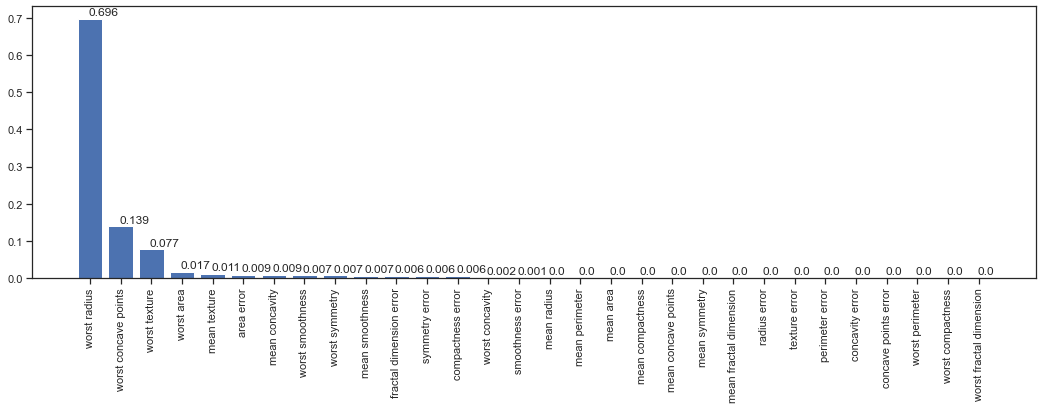

In [37]:
breast_tree_cl_fl, breast_tree_cl_fd = draw_feature_importances(breast_tree_cl, breast_x_ds)

In [38]:
# Список признаков, отсортированный на основе важности, и значения важности
breast_tree_cl_fl, breast_tree_cl_fd

(['worst radius',
  'worst concave points',
  'worst texture',
  'worst area',
  'mean texture',
  'area error',
  'mean concavity',
  'worst smoothness',
  'worst symmetry',
  'mean smoothness',
  'fractal dimension error',
  'symmetry error',
  'compactness error',
  'worst concavity',
  'smoothness error',
  'mean radius',
  'mean perimeter',
  'mean area',
  'mean compactness',
  'mean concave points',
  'mean symmetry',
  'mean fractal dimension',
  'radius error',
  'texture error',
  'perimeter error',
  'concavity error',
  'concave points error',
  'worst perimeter',
  'worst compactness',
  'worst fractal dimension'],
 [0.6955935182252058,
  0.1389382501669036,
  0.07728413233375948,
  0.016724478603093007,
  0.011277152370382112,
  0.008936807857691388,
  0.008771118510297198,
  0.007387982534891388,
  0.007315997688141106,
  0.007016894808237761,
  0.00644408706878978,
  0.005831348020582203,
  0.005638576185191056,
  0.0018358155021552392,
  0.0010038401246787545,
  0.0,
 

In [39]:
# Пересортируем признаки на основе важности
breast_x_ds_sorted = breast_x_ds[breast_tree_cl_fl]
breast_x_ds_sorted.head()

,worst radius,worst concave points,worst texture,worst area,mean texture,area error,mean concavity,worst smoothness,worst symmetry,mean smoothness,...,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,concavity error,concave points error,worst perimeter,worst compactness,worst fractal dimension
0,25.38,0.2654,17.33,2019.0,10.38,153.40,0.3001,0.1622,0.4601,0.11840,...,0.2419,0.07871,1.0950,0.9053,8.589,0.05373,0.01587,184.60,0.6656,0.11890
1,24.99,0.1860,23.41,1956.0,17.77,74.08,0.0869,0.1238,0.2750,0.08474,...,0.1812,0.05667,0.5435,0.7339,3.398,0.01860,0.01340,158.80,0.1866,0.08902
2,23.57,0.2430,25.53,1709.0,21.25,94.03,0.1974,0.1444,0.3613,0.10960,...,0.2069,0.05999,0.7456,0.7869,4.585,0.03832,0.02058,152.50,0.4245,0.08758
3,14.91,0.2575,26.50,567.7,20.38,27.23,0.2414,0.2098,0.6638,0.14250,...,0.2597,0.09744,0.4956,1.1560,3.445,0.05661,0.01867,98.87,0.8663,0.17300
4,22.54,0.1625,16.67,1575.0,14.34,94.44,0.1980,0.1374,0.2364,0.10030,...,0.1809,0.05883,0.7572,0.7813,5.438,0.05688,0.01885,152.20,0.2050,0.07678


In [40]:
breast_X_train_2, breast_X_test_2, breast_y_train_2, breast_y_test_2 = train_test_split(
    breast_x_ds_sorted, breast.target, test_size=0.5, random_state=1)
breast_X_train_2.shape, breast_X_test_2.shape

((284, 30), (285, 30))

In [41]:
# Обучим дерево и предскажем результаты на всех признаках 
breast_tree_cl_feat_1 = DecisionTreeClassifier(random_state=1).fit(breast_X_train_2, breast_y_train_2)
breast_y_test_predict = breast_tree_cl_feat_1.predict(breast_X_test_2)
breast_y_test_predict.shape

(285,)

In [42]:
# Проверим точность по классам
print_accuracy_score_for_classes(breast_y_test_2, breast_y_test_predict)

Метка 	 Accuracy
0 	 0.8737864077669902
1 	 0.9010989010989011


In [43]:
# Обучим дерево и предскажем результаты на единственном самом важном признаке 
breast_tree_cl_feat_2 = DecisionTreeClassifier(random_state=1).fit(breast_X_train_2[[breast_tree_cl_fl[0]]], breast_y_train_2)
breast_y_test_predict_2 = breast_tree_cl_feat_2.predict(breast_X_test_2[[breast_tree_cl_fl[0]]])
breast_y_test_predict_2.shape

(285,)

In [44]:
# Проверим точность по классам
print_accuracy_score_for_classes(breast_y_test_2, breast_y_test_predict_2)

Метка 	 Accuracy
0 	 0.7766990291262136
1 	 0.8956043956043956


## Качество моделей с помощью двух подходящих для задачи метрик. Сравнение качеств полученных моделей.

**В качестве метрик для решения задачи классификации  будем использовать:**

- Метрика precision: $precision = \frac{TP}{TP+FP}$
- Метрика recall (полнота): $recall = \frac{TP}{TP+FN}$

In [45]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

In [46]:
# Логистическая регрессия (LogisticRegression)
precision_score(breast_y_test, pred_breast_y_test), recall_score(breast_y_test, pred_breast_y_test)

(0.9351351351351351, 0.9505494505494505)

In [47]:
# Метод опорных векторов (SVC)
precision_score(breast_y_test_1, breast_y_pred_1), recall_score(breast_y_test_1, breast_y_pred_1)

(0.89, 0.978021978021978)

In [48]:
# Деревья решений (DecisionTreeClassifier)
precision_score(breast_y_test_2, breast_y_test_predict_2), recall_score(breast_y_test_2, breast_y_test_predict_2)

(0.8763440860215054, 0.8956043956043956)

In [49]:
# Логистическая регрессия
accuracy_score(breast_y_test, pred_breast_y_test)

0.9263157894736842

In [50]:
# Метод опорных векторов (SVC)
accuracy_score(breast_y_test_1, breast_y_pred_1)

0.9087719298245615

In [51]:
# Деревья решений (DecisionTreeClassifier)
accuracy_score(breast_y_test_2, breast_y_test_predict_2)

0.8526315789473684

In [52]:
# Результаты
array_labels = ['LogisticRegression','SVC', 'DecisionTreeClassifier']
array_mae = [precision_score(breast_y_test, pred_breast_y_test), 
             precision_score(breast_y_test_1, breast_y_pred_1), 
             precision_score(breast_y_test_2, breast_y_test_predict_2)]

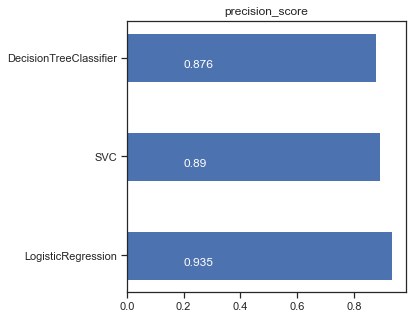

In [53]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'precision_score')

In [54]:
# Результаты
array_labels = ['LogisticRegression','SVC', 'DecisionTreeClassifier']
array_mae = [recall_score(breast_y_test, pred_breast_y_test), 
             recall_score(breast_y_test_1, breast_y_pred_1), 
             recall_score(breast_y_test_2, breast_y_test_predict_2)]

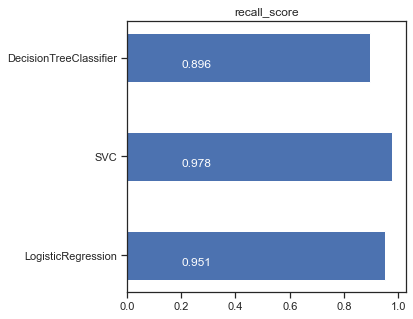

In [55]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'recall_score')

In [56]:
# Результаты
array_labels = ['LogisticRegression','SVC', 'DecisionTreeClassifier']
array_mae = [accuracy_score(breast_y_test, pred_breast_y_test), 
             accuracy_score(breast_y_test_1, breast_y_pred_1), 
             accuracy_score(breast_y_test_2, breast_y_test_predict_2)]

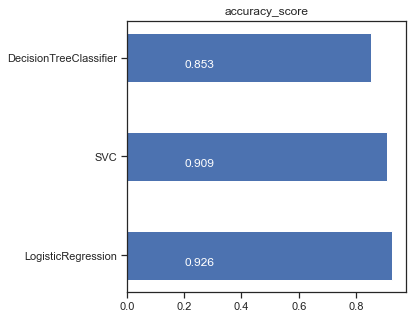

In [57]:
# Визуализация результатов
vis_models_quality(array_mae, array_labels, 'accuracy_score')